# MTA  Data analysis

In [ ]:
# Data explain
'''
C/A      = Control Area
UNIT     = Remote Unit for a station
SCP      = Subunit Channel Position represents an specific address for a device
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device

code cited from metis bootcamp EDA MTA_3 

'''

In [2]:
import pandas as pd

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [211002,211009,211016,211023,211030,211106,211113,211120,211127,211204,211211,211218,211225]
turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.groupby("STATION").count().head()

,C/A,UNIT,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
STATION,,,,,,,,,,
1 AV,13151,13151,13151,13151,13151,13151,13151,13151,13151,13151
103 ST,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210
103 ST-CORONA,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932
104 ST,4910,4910,4910,4910,4910,4910,4910,4910,4910,4910
110 ST,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276


In [5]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
import datetime

In [8]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00


In [10]:
#Check "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
405945,G001,R151,00-05-01,CONEY IS-STILLW,2021-11-08 00:00:00,2
2710700,S101,R070,00-00-02,ST. GEORGE,2021-10-02 00:00:00,2
2710688,S101,R070,00-00-02,ST. GEORGE,2021-09-30 00:00:00,2
2710714,S101,R070,00-00-02,ST. GEORGE,2021-10-04 08:00:00,2
2710691,S101,R070,00-00-02,ST. GEORGE,2021-09-30 12:00:00,2


In [11]:
# two entries for same time on 11/8 CONEY IS-STILLW
mask = ((turnstiles_df["C/A"] == "G001") & 
(turnstiles_df["UNIT"] == "R151") & 
(turnstiles_df["SCP"] == "00-05-01") & 
(turnstiles_df["STATION"] == "CONEY IS-STILLW") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 11, 8).date()))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
31478,G001,R151,00-05-01,CONEY IS-STILLW,DFNQ,BMT,11/08/2021,00:00:00,REGULAR,327700,29,2021-11-08 00:00:00
31479,G001,R151,00-05-01,CONEY IS-STILLW,DFNQ,BMT,11/08/2021,00:00:00,RECOVR AUD,0,367,2021-11-08 00:00:00
31480,G001,R151,00-05-01,CONEY IS-STILLW,DFNQ,BMT,11/08/2021,04:00:00,REGULAR,327700,29,2021-11-08 04:00:00
31481,G001,R151,00-05-01,CONEY IS-STILLW,DFNQ,BMT,11/08/2021,04:00:00,RECOVR AUD,0,367,2021-11-08 04:00:00
31482,G001,R151,00-05-01,CONEY IS-STILLW,DFNQ,BMT,11/08/2021,08:00:00,REGULAR,327700,29,2021-11-08 08:00:00


In [99]:
turnstiles_df.DESC.value_counts()

REGULAR       2721684
RECOVR AUD      10919
Name: DESC, dtype: int64

In [12]:
# delete duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
# unique check
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-09-25 00:00:00,1
1821692,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 15:00:00,1
1821694,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 23:00:00,1
1821695,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 03:00:00,1
1821696,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 07:00:00,1


In [15]:
# Drop Exits and Desc Column.
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
210382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,20:00:00,5562,2021-12-24 20:00:00
210381,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,16:00:00,5562,2021-12-24 16:00:00
210380,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,12:00:00,5562,2021-12-24 12:00:00
210379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,08:00:00,5562,2021-12-24 08:00:00
210378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,04:00:00,5562,2021-12-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,7641265,2021-09-25 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,7641135,2021-09-25 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,7641100,2021-09-25 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,7641091,2021-09-25 04:00:00


In [16]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [18]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,09/25/2021,7641437
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823
5,A002,R051,02-00-00,59 ST,09/30/2021,7644508
6,A002,R051,02-00-00,59 ST,10/01/2021,7645237
7,A002,R051,02-00-00,59 ST,10/02/2021,7645650
8,A002,R051,02-00-00,59 ST,10/03/2021,7646010
9,A002,R051,02-00-00,59 ST,10/04/2021,7646634


In [19]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4241375361.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [20]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,09/25/2021,7641437,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833,09/25/2021,7641437.0
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473,09/26/2021,7641833.0
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137,09/27/2021,7642473.0
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823,09/28/2021,7643137.0


In [21]:
# Drop the 1st row
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
#check reversed tour
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,09/26/2021,885570243,09/25/2021,885570461.0
3551,A011,R080,01-03-00,57 ST-7 AV,09/27/2021,885569924,09/26/2021,885570243.0
3552,A011,R080,01-03-00,57 ST-7 AV,09/28/2021,885569556,09/27/2021,885569924.0
3553,A011,R080,01-03-00,57 ST-7 AV,09/29/2021,885569200,09/28/2021,885569556.0
3554,A011,R080,01-03-00,57 ST-7 AV,09/30/2021,885568831,09/29/2021,885569200.0


In [23]:
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 9, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1445,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2021,20:00:00,512123,2021-09-27 20:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2021,16:00:00,512035,2021-09-27 16:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2021,12:00:00,511966,2021-09-27 12:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2021,08:00:00,511938,2021-09-27 08:00:00
1441,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2021,04:00:00,511929,2021-09-27 04:00:00


In [24]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         90
A013  R081  01-03-00  49 ST               1
A015  R081  00-00-02  49 ST               1
A046  R463  00-05-02  CANAL ST            1
A049  R088  02-05-00  CORTLANDT ST       67
                                         ..
R604  R108  03-00-03  BOROUGH HALL        1
R612  R057  01-05-00  ATL AV-BARCLAY      1
R622  R123  00-00-00  FRANKLIN AV        90
R730  R431  00-00-04  EASTCHSTER/DYRE    82
S101  R070  00-00-02  ST. GEORGE          2
Length: 198, dtype: int64

In [25]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

50 5264647.0
6 5597786.0
233 1951349.0
128 1458351.0
24 453053819.0
1562967890 113672.0
63 9631506.0
307 3295646.0
327710 1560335855.0
117453575 459314.0
85 2547887.0
67136025 290390.0
1979658580 9048026.0
587209538 2350346.0
687930029 2704968.0
864279 1979303.0
369104686 1458906.0
1966428 196464.0
83942360 378941.0
264 6114636.0
233 7403550.0
168 9321838.0
100704922 418210.0
116 12553622.0
46007131 7828674.0
240 67470015.0
2151581 1043925813.0
147 1132786.0
393355 3680668.0
2031760 4435692.0
1636500577 2450105.0
643259 2359165.0
992215840 1896551.0
1084 2958634.0
278 11194856.0
102 8302369.0
131 1617704.0
241 2818347.0
305 10685559.0
553 3506117.0
393225 135403962.0
50331648 262144.0
4278402 25672.0
374 21944736.0
377 3232067.0
146744159 1089940461.0
393940 136995130.0
443 4026667.0
69 9261341.0
34 3478770.0


In [27]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # counter is reversed
        counter = -counter
    if counter > max_counter:
        # counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

50 5264647.0
6 5597786.0
233 1951349.0
128 1458351.0
24 453053819.0
1562967890 113672.0
63 9631506.0
307 3295646.0
327710 1560335855.0
117453575 459314.0
85 2547887.0
67136025 290390.0
1979658580 9048026.0
587209538 2350346.0
687930029 2704968.0
864279 1979303.0
369104686 1458906.0
1966428 196464.0
83942360 378941.0
264 6114636.0
233 7403550.0
168 9321838.0
100704922 418210.0
116 12553622.0
46007131 7828674.0
240 67470015.0
2151581 1043925813.0
147 1132786.0
393355 3680668.0
2031760 4435692.0
1636500577 2450105.0
643259 2359165.0
992215840 1896551.0
1084 2958634.0
278 11194856.0
102 8302369.0
131 1617704.0
241 2818347.0
305 10685559.0
553 3506117.0
393225 135403962.0
50331648 262144.0
4278402 25672.0
374 21944736.0
377 3232067.0
146744159 1089940461.0
393940 136995130.0
443 4026667.0
69 9261341.0
34 3478770.0


In [28]:
turnstiles_daily=turnstiles_daily[turnstiles_daily.DAILY_ENTRIES<20000]
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,09/26/2021,7641833,09/25/2021,7641437.0,396.0
2,A002,R051,02-00-00,59 ST,09/27/2021,7642473,09/26/2021,7641833.0,640.0
3,A002,R051,02-00-00,59 ST,09/28/2021,7643137,09/27/2021,7642473.0,664.0
4,A002,R051,02-00-00,59 ST,09/29/2021,7643823,09/28/2021,7643137.0,686.0
5,A002,R051,02-00-00,59 ST,09/30/2021,7644508,09/29/2021,7643823.0,685.0


In [30]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/26/2021,6795.0
1,1 AV,09/27/2021,9456.0
2,1 AV,09/28/2021,9726.0
3,1 AV,09/29/2021,10333.0
4,1 AV,09/30/2021,10624.0


In [70]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,4810538.0
1,34 ST-HERALD SQ,3654730.0
2,GRD CNTRL-42 ST,3487603.0
3,23 ST,3293719.0
4,86 ST,3269783.0


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
import numpy as np

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

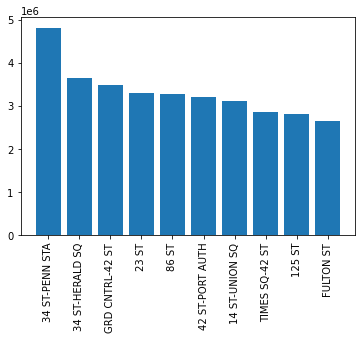

In [73]:
#Top 10 stations
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

In [74]:
station_daily_34_PENN = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
station_daily_34_HERALD = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ']
station_daily_42_GC = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST']
station_daily_23_ST = station_daily[station_daily['STATION'] == '23 ST']
station_daily_86_ST = station_daily[station_daily['STATION'] == '86 ST']
station_daily_42_ST_PORT = station_daily[station_daily['STATION'] == '42 ST-PORT AUTH']
station_daily_14_ST_UNION = station_daily[station_daily['STATION'] == '14 ST-UNION SQ']
station_daily_TIME_SQ = station_daily[station_daily['STATION'] == 'TIMES SQ-42 ST']
station_daily_125_ST = station_daily[station_daily['STATION'] == '125 ST']
station_daily_FULTON_ST = station_daily[station_daily['STATION'] == 'FULTON ST']
station_daily_34_PENN.head()


,STATION,DATE,DAILY_ENTRIES
5490,34 ST-PENN STA,09/26/2021,29646.0
5491,34 ST-PENN STA,09/27/2021,53590.0
5492,34 ST-PENN STA,09/28/2021,54888.0
5493,34 ST-PENN STA,09/29/2021,56158.0
5494,34 ST-PENN STA,09/30/2021,58354.0


Text(0.5, 1.0, 'Daily Entries for station_daily_34_PENN Station')

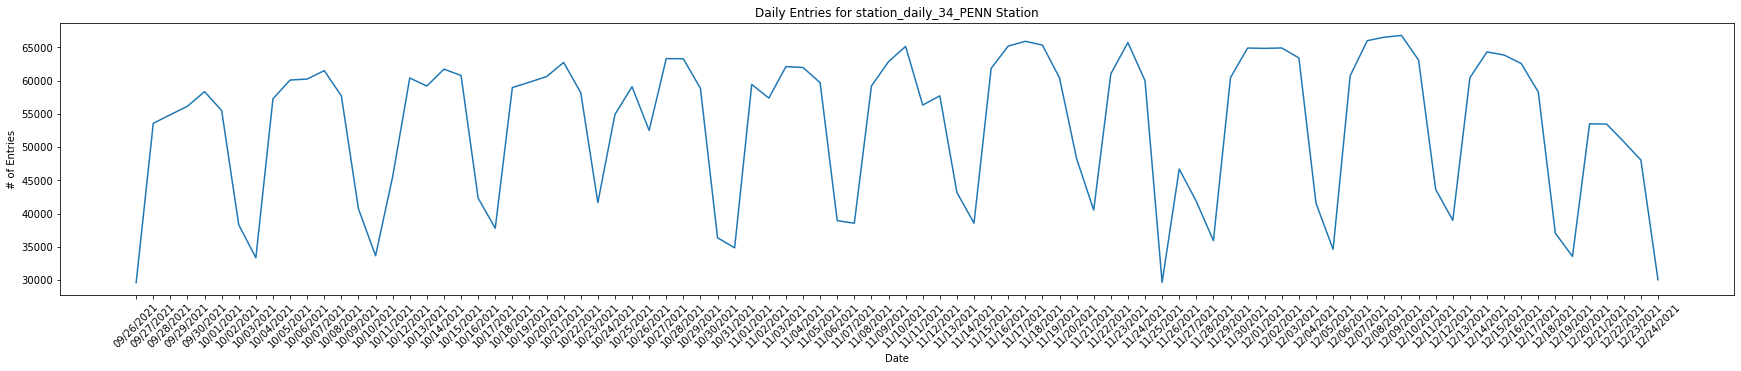

In [75]:
plt.figure(figsize=(30,5))
plt.plot(station_daily_34_PENN['DATE'], station_daily_34_PENN['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for station_daily_34_PENN Station')


In [76]:
station_daily_34_PENN['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_PENN['DATE']).dt.dayofweek
station_daily_34_PENN['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_PENN['DATE']).dt.week
station_daily_34_PENN.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/381975721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34_PENN['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_PENN['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/381975721.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34_PENN['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_PENN['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/381975721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
5490,34 ST-PENN STA,09/26/2021,29646.0,6,38
5491,34 ST-PENN STA,09/27/2021,53590.0,0,39
5492,34 ST-PENN STA,09/28/2021,54888.0,1,39
5493,34 ST-PENN STA,09/29/2021,56158.0,2,39
5494,34 ST-PENN STA,09/30/2021,58354.0,3,39


Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA station')

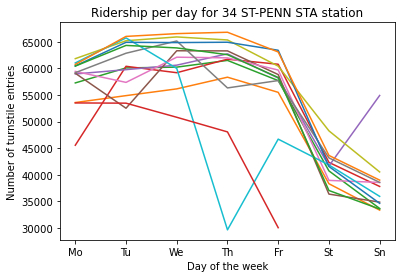

In [77]:
for i, group in station_daily_34_PENN.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-PENN STA station')

In [78]:
station_daily_34_HERALD['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_HERALD['DATE']).dt.dayofweek
station_daily_34_HERALD['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_HERALD['DATE']).dt.week
station_daily_34_HERALD.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1370789504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34_HERALD['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_HERALD['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1370789504.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34_HERALD['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_HERALD['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1370789504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
5310,34 ST-HERALD SQ,09/26/2021,26326.0,6,38
5311,34 ST-HERALD SQ,09/27/2021,39442.0,0,39
5312,34 ST-HERALD SQ,09/28/2021,38716.0,1,39
5313,34 ST-HERALD SQ,09/29/2021,41100.0,2,39
5314,34 ST-HERALD SQ,09/30/2021,43104.0,3,39


Text(0.5, 1.0, 'Ridership per day for 34 ST-HERALD SQ station')

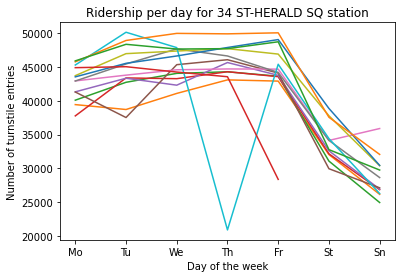

In [79]:
for i, group in station_daily_34_HERALD.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-HERALD SQ station')


In [80]:
station_daily_42_GC['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_GC['DATE']).dt.dayofweek
station_daily_42_GC['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_GC['DATE']).dt.week
station_daily_42_GC.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4191623080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_42_GC['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_GC['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4191623080.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_42_GC['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_GC['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4191623080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
20960,GRD CNTRL-42 ST,09/26/2021,19642.0,6,38
20961,GRD CNTRL-42 ST,09/27/2021,40464.0,0,39
20962,GRD CNTRL-42 ST,09/28/2021,44096.0,1,39
20963,GRD CNTRL-42 ST,09/29/2021,44917.0,2,39
20964,GRD CNTRL-42 ST,09/30/2021,45475.0,3,39


Text(0.5, 1.0, 'Ridership per day for GRD CNTRL-42 ST')

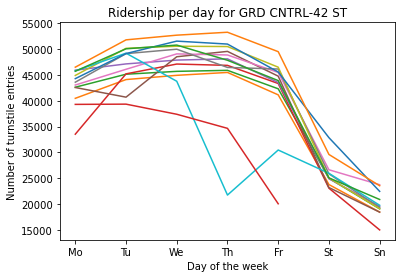

In [81]:
for i, group in station_daily_42_GC.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for GRD CNTRL-42 ST')

In [82]:
station_daily_23_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_23_ST['DATE']).dt.dayofweek
station_daily_23_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_23_ST['DATE']).dt.week
station_daily_23_ST.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3501289766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_23_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_23_ST['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3501289766.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_23_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_23_ST['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3501289766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
4140,23 ST,09/26/2021,18893.0,6,38
4141,23 ST,09/27/2021,38546.0,0,39
4142,23 ST,09/28/2021,41275.0,1,39
4143,23 ST,09/29/2021,43253.0,2,39
4144,23 ST,09/30/2021,43191.0,3,39


Text(0.5, 1.0, 'Ridership per day for 23 ST')

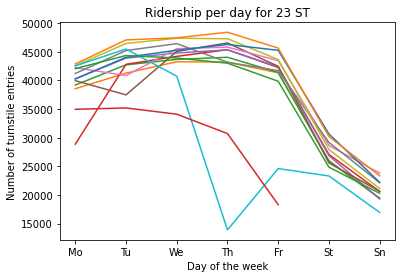

In [83]:
for i, group in station_daily_23_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 23 ST')

In [84]:
station_daily_86_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_86_ST['DATE']).dt.dayofweek
station_daily_86_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_86_ST['DATE']).dt.week
station_daily_86_ST.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3070505329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_86_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_86_ST['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3070505329.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_86_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_86_ST['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3070505329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
9900,86 ST,09/26/2021,21316.0,6,38
9901,86 ST,09/27/2021,39716.0,0,39
9902,86 ST,09/28/2021,40881.0,1,39
9903,86 ST,09/29/2021,42056.0,2,39
9904,86 ST,09/30/2021,43140.0,3,39


Text(0.5, 1.0, 'Ridership per day for 86 ST')

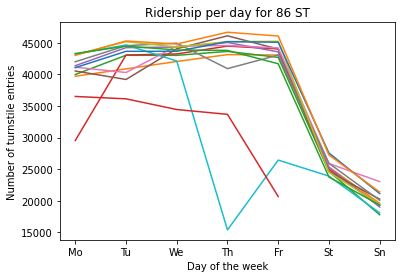

In [85]:
for i, group in station_daily_86_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 86 ST')

In [86]:
station_daily_42_ST_PORT['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_ST_PORT['DATE']).dt.dayofweek
station_daily_42_ST_PORT['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_ST_PORT['DATE']).dt.week
station_daily_42_ST_PORT.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3260390964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_42_ST_PORT['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_ST_PORT['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3260390964.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_42_ST_PORT['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_ST_PORT['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3260390964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
6120,42 ST-PORT AUTH,09/26/2021,21344.0,6,38
6121,42 ST-PORT AUTH,09/27/2021,37234.0,0,39
6122,42 ST-PORT AUTH,09/28/2021,36819.0,1,39
6123,42 ST-PORT AUTH,09/29/2021,38602.0,2,39
6124,42 ST-PORT AUTH,09/30/2021,39291.0,3,39


Text(0.5, 1.0, 'Ridership per day for 42 ST-PORT AUTH ')

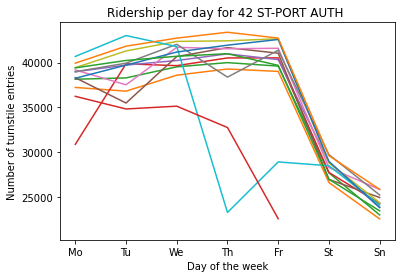

In [87]:
for i, group in station_daily_42_ST_PORT.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 42 ST-PORT AUTH ')

In [88]:
station_daily_14_ST_UNION['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_14_ST_UNION['DATE']).dt.dayofweek
station_daily_14_ST_UNION['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_14_ST_UNION['DATE']).dt.week
station_daily_14_ST_UNION.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1939564557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_14_ST_UNION['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_14_ST_UNION['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1939564557.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_14_ST_UNION['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_14_ST_UNION['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/1939564557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
1260,14 ST-UNION SQ,09/26/2021,22308.0,6,38
1261,14 ST-UNION SQ,09/27/2021,35819.0,0,39
1262,14 ST-UNION SQ,09/28/2021,36798.0,1,39
1263,14 ST-UNION SQ,09/29/2021,39893.0,2,39
1264,14 ST-UNION SQ,09/30/2021,39503.0,3,39


Text(0.5, 1.0, 'Ridership per day for 14 ST-UNION SQ ')

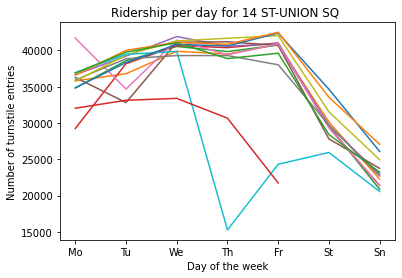

In [89]:
for i, group in station_daily_14_ST_UNION.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 14 ST-UNION SQ ')

In [90]:
station_daily_TIME_SQ['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_TIME_SQ['DATE']).dt.dayofweek
station_daily_TIME_SQ['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_TIME_SQ['DATE']).dt.week
station_daily_TIME_SQ.head()

C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4030990274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_TIME_SQ['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_TIME_SQ['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4030990274.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_TIME_SQ['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_TIME_SQ['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/4030990274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
31681,TIMES SQ-42 ST,09/26/2021,22408.0,6,38
31682,TIMES SQ-42 ST,09/27/2021,29532.0,0,39
31683,TIMES SQ-42 ST,09/28/2021,29444.0,1,39
31684,TIMES SQ-42 ST,09/29/2021,31956.0,2,39
31685,TIMES SQ-42 ST,09/30/2021,31758.0,3,39


Text(0.5, 1.0, 'Ridership per day for TIME SQ-42 ST')

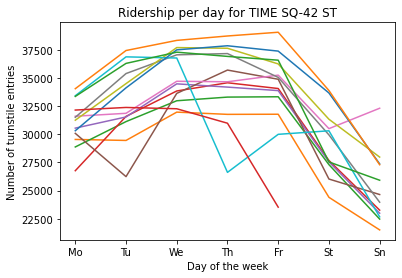

In [91]:
for i, group in station_daily_TIME_SQ .groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for TIME SQ-42 ST')

In [92]:
station_daily_125_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_125_ST['DATE']).dt.dayofweek
station_daily_125_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_125_ST['DATE']).dt.week
station_daily_125_ST.head()


C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/2993998407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_125_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_125_ST['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/2993998407.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_125_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_125_ST['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/2993998407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
810,125 ST,09/26/2021,18703.0,6,38
811,125 ST,09/27/2021,35333.0,0,39
812,125 ST,09/28/2021,35611.0,1,39
813,125 ST,09/29/2021,37239.0,2,39
814,125 ST,09/30/2021,37754.0,3,39


Text(0.5, 1.0, 'Ridership per day for 125 ST')

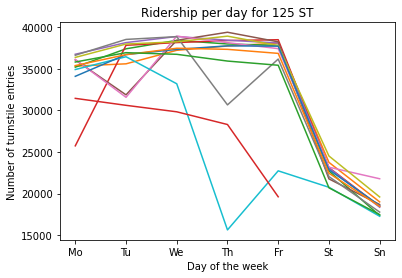

In [93]:
for i, group in station_daily_125_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 125 ST')


In [94]:
station_daily_FULTON_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_FULTON_ST['DATE']).dt.dayofweek
station_daily_FULTON_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_FULTON_ST['DATE']).dt.week
station_daily_FULTON_ST.head()


C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3372306463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_FULTON_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_FULTON_ST['DATE']).dt.dayofweek
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3372306463.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_FULTON_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_FULTON_ST['DATE']).dt.week
C:\Users\sherl\AppData\Local\Temp/ipykernel_8116/3372306463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
20330,FULTON ST,09/26/2021,15761.0,6,38
20331,FULTON ST,09/27/2021,32477.0,0,39
20332,FULTON ST,09/28/2021,34024.0,1,39
20333,FULTON ST,09/29/2021,35785.0,2,39
20334,FULTON ST,09/30/2021,36716.0,3,39


Text(0.5, 1.0, 'Ridership per day for FULTON ST ')

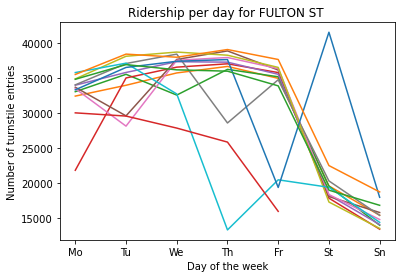

In [95]:
for i, group in station_daily_FULTON_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for FULTON ST ')